<center><h1>Online Shoppers Intention Prediction</h1></center> 


### Data Source: 
http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
        
### Data Description: 

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.
Numerical features
Feature name 	Feature description 	Min. val 	Max. val 	SD
Admin. 	#pages visited by the visitor about account management 	0 	27 	3.32
Ad. duration 	#seconds spent by the visitor on account management related pages 	0 	3398 	176.70
Info. 	#informational pages visited by the visitor 	0 	24 	1.26
Info. durat. 	#seconds spent by the visitor on informational pages 	0 	2549 	140.64
Prod. 	#pages visited by visitor about product related pages 	0 	705 	44.45
Prod.durat. 	#seconds spent by the visitor on product related pages 	0 	63,973 	1912.3
Bounce rate 	Average bounce rate value of the pages visited by the visitor 	0 	0.2 	0.04
Exit rate 	Average exit rate value of the pages visited by the visitor 	0 	0.2 	0.05
Page value 	Average page value of the pages visited by the visitor 	0 	361 	18.55
Special day 	Closeness of the site visiting time to a special day 	0 	1.0 	0.19
Categorical features
Feature name 	Feature description 	Number of Values
OperatingSystems 	Operating system of the visitor 	8
Browser 	Browser of the visitor 	13
Region 	Geographic region from which the session has been started by the visitor 	9
TrafficType 	Traffic source (e.g., banner, SMS, direct) 	20
VisitorType 	Visitor type as “New Visitor,” “Returning Visitor,” and “Other” 	3
Weekend 	Boolean value indicating whether the date of the visit is weekend 	2
Month 	Month value of the visit date 	12
Revenue 	Class label: whether the visit has been finalized with a transaction 	2
Project Goal

The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

We will try a number of different classification algorithms, and compare their performance, in order to pick the best one for the project.
Libraries Import¶


### Project Goal
The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( _buy_ or _no_ _buy_ ), based on the values of the given features. 

We will try a number of different classification algorithms, and compare their performance, in order to pick the best one for the project.

### Importing Libreries

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

### Data Description: 

#### Data Header

In [3]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


#### Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Here we can see that most of our dataset is numerical, either integers or floats; Revenue and Weekend are boolean type, and they can easly be transformed into binary type (0 & 1). 

#### Statistical Analysis of Our Dataset

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

#### Missing Data Points

In [6]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


As per above results there is no missing values.

#### Data Type Fix

We should transform *Revenue* & *Weekend* from *boolean* into *binary* (int), so that we can use them in our later calculations with no issues. 

In [7]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

Dataset info after revised:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Exploratory Data Analysis

#### Correlation Analysis

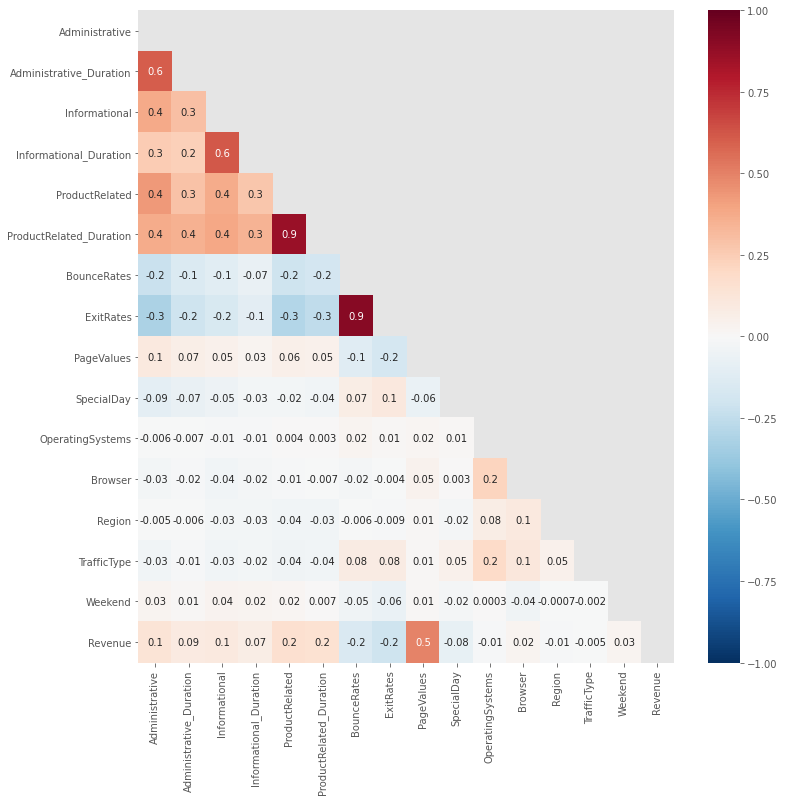

In [9]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above heatmap, we observe the following: 
- In general, there is very little correlation among the different features in our dataset. 
- The very few cases of high correlation (|corr| >= 0.7) are: 
    - BounceRates & ExitRates (0.9). 
    - ProductRelated & ProductRelated_Duration (0.9).
- Moderate Correlations (0.3 < |corr| < 0.7): 
    - Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration. 
    - Also between PageValues and Revenue. 

This is correlation among a few of our features:

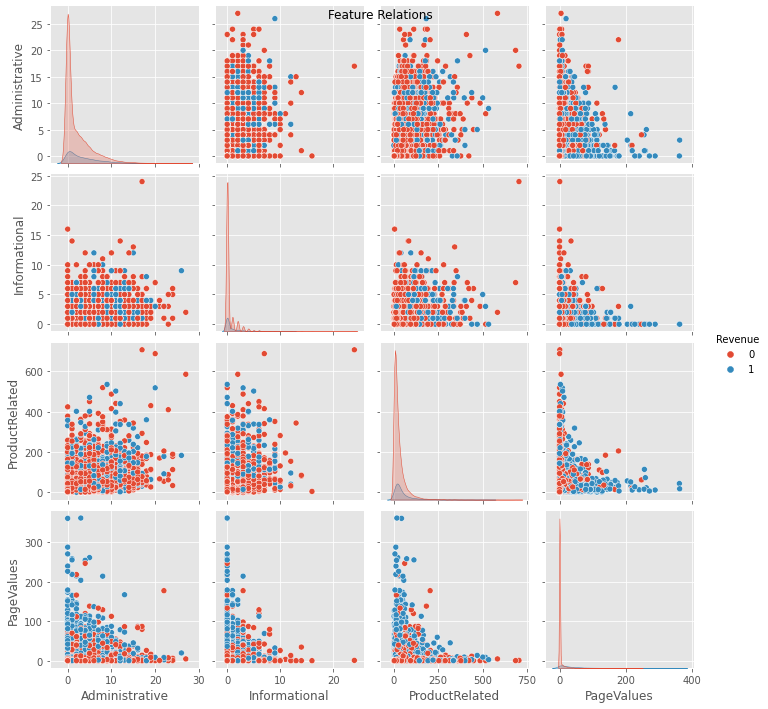

In [10]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

From the above figure, we can see:

   - No strong correlation between Revenue (our target) and any other feature.
   - A strong negative correlation between PageValues and other features shown.



#### Web Pages Analysis

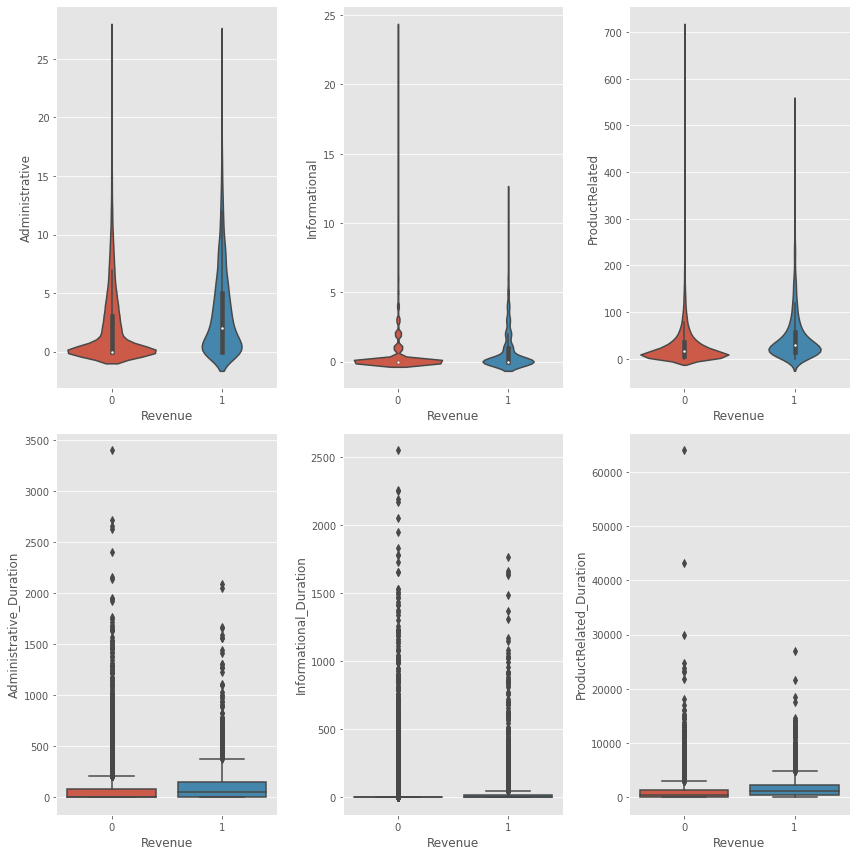

In [11]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can say:
- In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase. 
- The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
- The first 3 feature look like they follow a skewed normal distribution. 

#### Page Metrics Analysis

/home/kg/code/jupyterenvironment/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kg/code/jupyterenvironment/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kg/code/jupyterenvironment/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

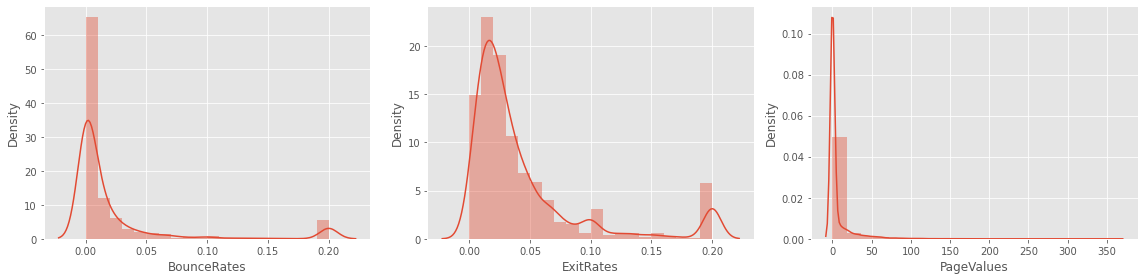

In [12]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude:

    BounceRates & PageValues do not follow a normal distribution.
    All 3 features have distributions that are skewed right.
    All 3 distributions have a lot of outliers.
    The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website.
    Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase.
    Bounce rate ==> the percentage where the first page visited was the only page visited in that session.
    Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page.



#### Visitor Analysis

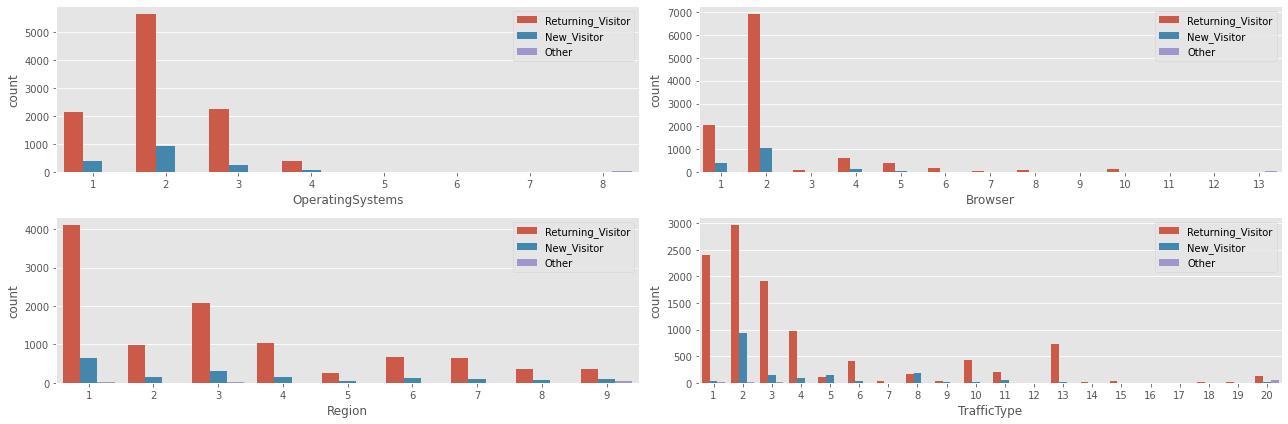

In [13]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()


   - 1 Operating system is responsible for ~7000 of the examples in our dataset.
   - 4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset.
   - A similar story repeated with the browsers used by visitors, where there is 1 dominant browser, 3 with decent representation in the dataset, and the rest are rarey used.
   - It looks like we have a very regionally diverse traffic in our dataset.
  -  Also Traffic sources are very diverse, with a few that did not contribute much to the dataset.



#### Visit Date Analysis

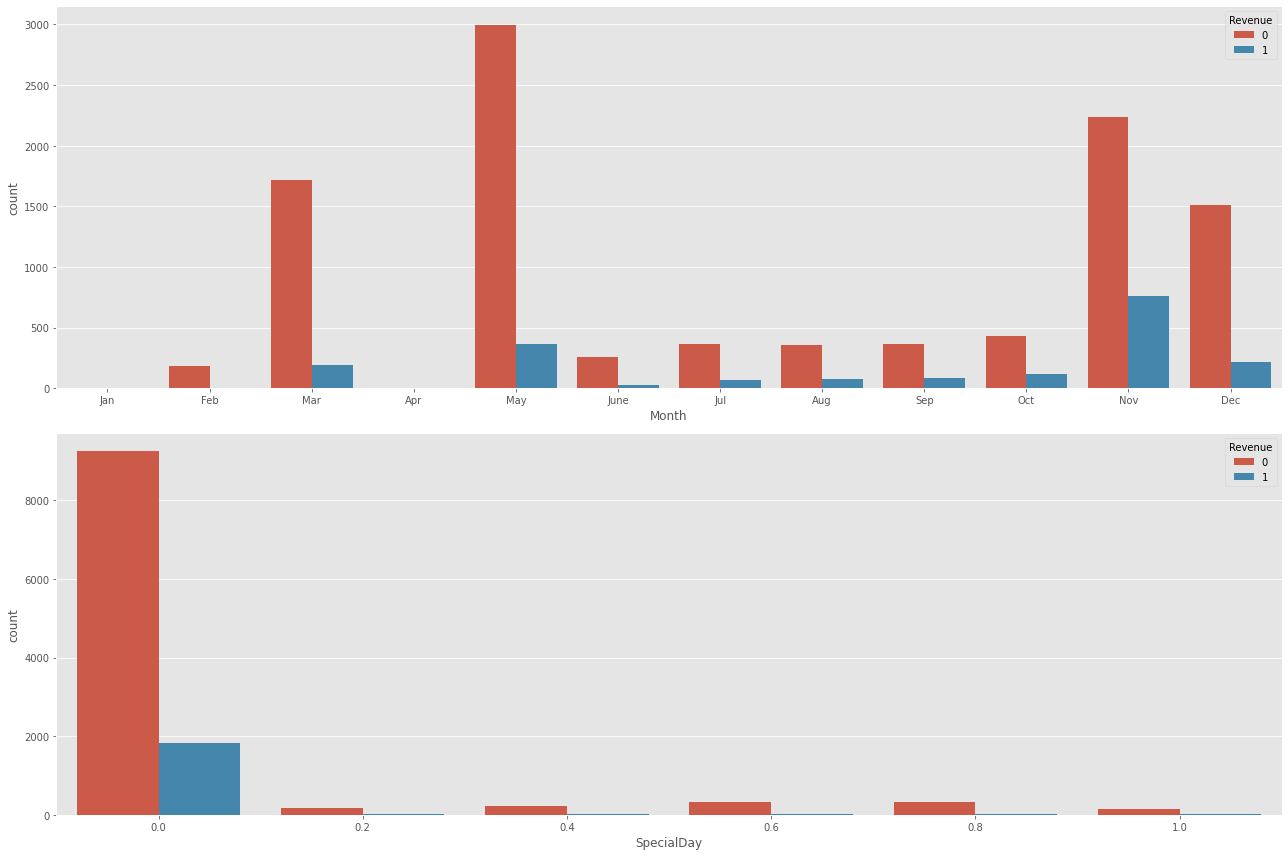

In [14]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

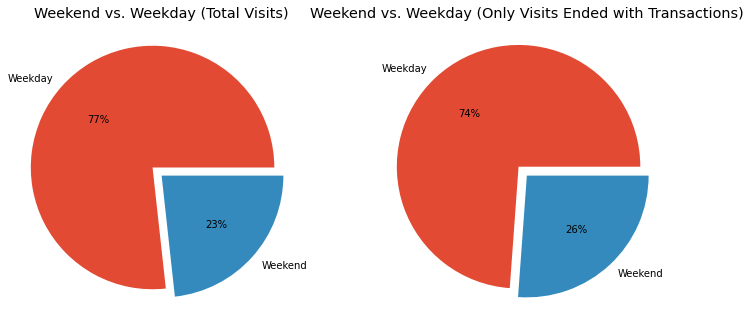

In [15]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

 On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level. 
- We have no visits at all during Jan nor Apr.
- Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions. 
- The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction. 
- Most of transactions happen on special days (SpecialDay =0). 
- It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays.

### Data Pre-Processing

In this section we will make our data ready for model training. This will include:

    Transform Month and VisitorType columns into numerical(binary) values. Split data set into training, validation, and testing parts (70/15/15), while separating Revenue column, where it will be used asour labels.We will apply feature scaling on our input data, in order to be used for Naive Bayes and  SVM model training.



#### Data Transformation

In [16]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [17]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


#### Data Split

In [18]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [19]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Now we have the following data subsets:
1. Train data (X_train) and trin labels (y_train) ==> 70%
2. Validation data (X_val) and validation labels (y_val) ==> 15%
3. Test data (X_test) and test labels (y)test) ==> 15%

#### Data Scaling

We will scale the features in our subsets, in order to use them to train, validate, and test models that will benefit from feature scaling.  

In [20]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Model Building

### Naive Bayes

We will go with a Gaussian Naive Bayes classifier, since some of our features are normally distributed, even though other features don't follow a normal distribution.

In [21]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.775013520822066
F1 Score        :  0.4914425427872861
Precision       :  0.3941176470588235
Recall          :  0.6525974025974026
Confusion Matrix:
  [[1232  309]
 [ 107  201]]


Naive Bayes result is less thsn desirable, one reason might be the Gaussian distribution assumption, which for sure does not fit all of the features in our dataset. 

### KNN

For K-Nearest Neighbor classifier, we will be using the scaled version of our dataset.

KNN is a non-parametric (no assumption for underlying data distribution) learning algorithm, the model structure determined from the dataset. This will be very helpful in dataset where many features do not follow a specific theoretical assumption.


In [22]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]


Compared to Naive Bayes, KNN's initial model causes a considerable increase in accuracy and F1 score, with a decrease in recall. Now we will try increase its performance even more with hyper-parameter tuning via grid search.  

##### KNN Tuning

The following KNN parameters will be tuned:

    leaf_size: Leaf size can affect the speed and the memory required to store the tree.
    n_neighbors: Number of neighbors to use
    p: determines the distance metric to be used: p=1 ==> manhattan_distance, and p=2 ==> euclidean_distance
    weights: weight function used in prediction



In [23]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20,30,40,50], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [24]:
knn_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 696 candidates, totalling 3480 fits
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.828, total=   8.2s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.845, total=   8.1s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.4s remaining:    0.0s


[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.849, total=   8.5s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.849, total=   8.2s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.848, total=   9.9s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.828, total=   8.1s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.845, total=   7.9s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.849, total=   8.1s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.849, tot

[Parallel(n_jobs=1)]: Done 3480 out of 3480 | elapsed: 334.7min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [25]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [26]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1, weights='distance')

In [27]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [28]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8674959437533802
F1 Score        :  0.44191343963553537
Precision       :  0.7404580152671756
Recall          :  0.31493506493506496
Confusion Matrix:
  [[1507   34]
 [ 211   97]]


We can see that a very slight change occured to KNN's performance after hyper-parameters tuning.

### SVM

For SVM classifier, we will be using the scaled version of our dataset.

SVM offers high accuracy classification, and it is known for its kernel trick to handle nonlinear input spaces. The classifier separates data points using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points.

In [29]:
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto') #default values

In [30]:
svm.fit(Xsc_train,y_train)

SVC(gamma='auto')

In [31]:
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

SVM Initial Performance:
------------------------
Accuracy        :  0.8875067604110329
F1 Score        :  0.5856573705179283
Precision       :  0.7577319587628866
Recall          :  0.4772727272727273
Confusion Matrix:
  [[1494   47]
 [ 161  147]]


Compared to KNN, SVM's initial model resulted in a considerable increase in all performance metrics. Now we will try increase its performance even more with hyper-parameter tuning via grid search.

##### SVM Tuning

The following parameters will be tuned: 
- Kernel: Transforms the given dataset into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. This transformation can lead to more accurate classifiers.
- Regularization: C parameter used to maintain regularization. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
- Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. A low value of gamma considers only nearby points in calculating the separation line, while a large value of gamma considers all the data points in the calculation of the separation line.

In [ ]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
svm_grid = GridSearchCV(SVC(),
                        svm_param_grid,
                        refit=True,
                        verbose=3)

In [ ]:
svm_grid.fit(Xsc_train,y_train)

In [ ]:
svm_grid.best_params_

In [ ]:
svm_grid.best_estimator_

In [ ]:
svm_grid = SVC(C=10,kernel='rbf',degree=3,gamma=0.01) #default values
svm_grid.fit(Xsc_train,y_train)

svm_grid_pred = svm_grid.predict(Xsc_val)

print('SVM Tuned Performance:')
print('----------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_grid_pred))

### Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and the independent variables by estimating probabilities using a logistic/sigmoid function. 

In [ ]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

In [ ]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [ ]:
lrm_grid.fit(X_train,y_train)

In [ ]:
lrm_grid.best_params_

In [ ]:
rm_grid.best_estimator_

In [ ]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

The random forest classifier (with default parameter values) give us higher accuracy and F1 score than all other classifiers tested so far. Next, we will try improving its performance (especially the recall) by tuning its hyper-parameters. 

##### Random Forest Tuning

Scikit-Learn documentation tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We will try adjusting the following set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node


Due to the large number of parameters and parameter values to be tested, we will use random search this time. 

In [ ]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [ ]:
rfm_grid.fit(X_train, y_train)

In [ ]:
rfm_grid.best_params_

In [ ]:
rfm_grid.best_estimator_

In [ ]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

### Gradient Boost

I will complete the Classifiers and modeling in final results